In [276]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.pyplot import figure
from IPython.display import display, Math, Latex
from matplotlib.legend_handler import HandlerLine2D

In [277]:
sp500 = web.get_data_yahoo('^GSPC', '1957-04-03', '2018-12-24', interval='d')
print("Number of days: " + str(len(sp500['Close'])))

Number of days: 15519


In [278]:
sLength = len(sp500['Close'])
sp500['Change'] = pd.Series(np.zeros(sLength), index=sp500.index)
for i in range(len(sp500['Close'])):
    if i > 0:
        sp500['Change'][i] = sp500['Close'][i] / sp500['Close'][i-1] * 100 - 100
    else:
        sp500['Change'][i] = float('NaN')

/home/cy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/cy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [279]:
#sp500['252d'] = sp500['Close'].rolling(window = 252).mean()

In [280]:
sumDiff = 0
for i in range(len(sp500['Close'])):
    sumDiff = sumDiff + (sp500['Close'][i] - sp500['Close'][0])

gaussianSum = (len(sp500['Close'])**2 + len(sp500['Close']))/2
avGrowth = sumDiff / gaussianSum
print("Average growth per day: " + str(avGrowth) + " Points")

Average growth per day: 0.07528372034870953 Points


In [309]:
from IPython.display import display, Math, Latex
display(Math(r'Growth_{Average} = \sum_{i = 1}^{Number\ of\ days} x_i\quad +\quad \frac{Number\ of\ days^2 \cdot Number\ of\ days}{2}'))

<IPython.core.display.Math object>

In [281]:
sLength = len(sp500['Close'])
print(sLength)
print(range(sLength))
sp500['Average'] = pd.Series(np.zeros(sLength), index=sp500.index)
for i in range(len(sp500['Close'])):
    if i > 0:
        sp500['Average'][i] = sp500['Close'][0] + avGrowth*i
    else:
        sp500['Average'][i] = float('NaN')

15519
range(0, 15519)


/home/cy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/cy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [282]:
#sp500

Text(0.5,1,'Average Growth of the S & P 500')

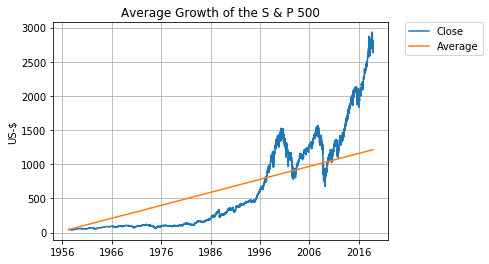

In [283]:
fig = figure(111)

x1 = fig.add_subplot(111)
x1.plot(sp500['Close'])
#x1.plot(sp500['252d'], label = '252d')
x1.plot(sp500['Average'], label = 'Average')
x1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
x1.grid(True)
x1.set_ylabel('US-$')
x1.set_title('Average Growth of the S & P 500')